In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Data Importing**

In [2]:
df = pd.read_csv('/content/supermarket.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


**Data Exploration**

In [3]:
# checking the shape
df.shape

(9800, 18)

In [4]:
# checking descriptice statistics
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# checking missing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


**Data Cleaning**

In [7]:
# Convert date columns to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=True, errors='coerce')

In [8]:
# filling missing values of postal code with mode
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])

In [9]:
# Convert 'Postal Code' to integer
df['Postal Code'] = df['Postal Code'].astype(int)

In [10]:
# Remove duplicate rows, keeping the first occurrence
df.drop_duplicates(inplace=True)

In [11]:
# Winsorize 'Sales' to handle outliers
from scipy.stats.mstats import winsorize
df['Sales'] = winsorize(df['Sales'], limits=[0, 0.05])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   int64         
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [13]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


**Analysis**

In [14]:
# exploring unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in column '{col}':")
    print(df[col].value_counts())


Unique values in column 'Order ID':
Order ID
CA-2018-100111    14
CA-2018-157987    12
US-2017-108504    11
CA-2017-165330    11
US-2016-126977    10
                  ..
CA-2018-139619     1
CA-2017-101343     1
CA-2018-120999     1
CA-2018-107727     1
CA-2016-106320     1
Name: count, Length: 4922, dtype: int64

Unique values in column 'Ship Mode':
Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

Unique values in column 'Customer ID':
Customer ID
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
JD-15895    32
            ..
LD-16855     1
JR-15700     1
CJ-11875     1
SC-20845     1
RE-19405     1
Name: count, Length: 793, dtype: int64

Unique values in column 'Customer Name':
Customer Name
William Brown       35
Matt Abelman        34
Paul Prost          34
John Lee            33
Jonathan Doherty    32
                    ..
Lela Donovan         1
Jocasta Rupert       1
Carl Jackson         

In [15]:
# lets find the correlarion
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Row ID,Postal Code,Sales
Row ID,1.000000,0.011723,-0.009243
Postal Code,0.011723,1.000000,-0.013638
Sales,-0.009243,-0.013638,1.000000


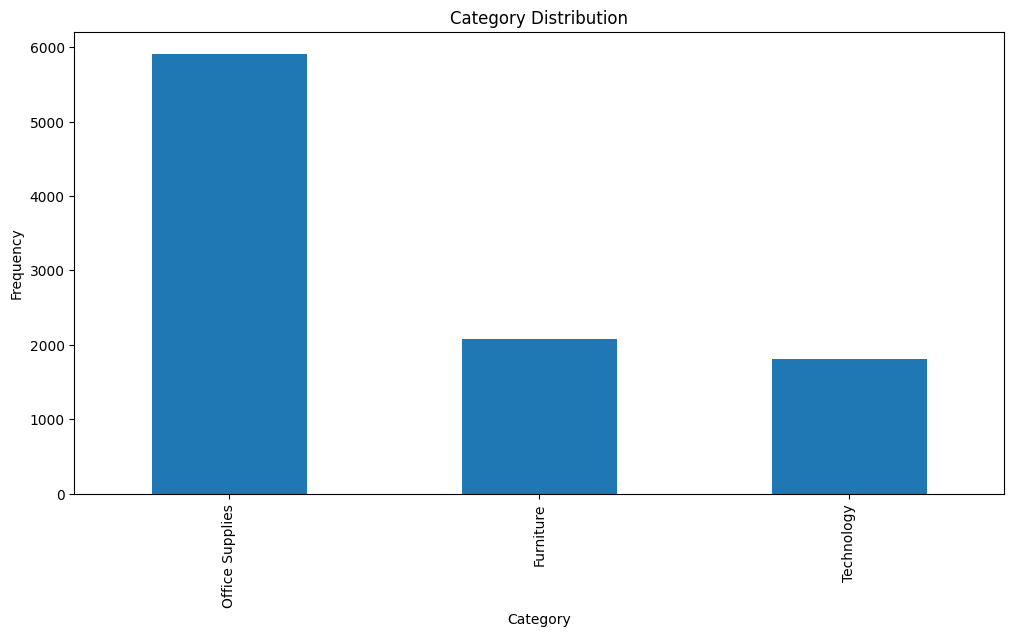

In [16]:
# category distribution
plt.figure(figsize=(12,6))
df['Category'].value_counts().plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()



*   Office Supplies has the highest number of transactions.
*   The business likely focuses more on office essentials, as indicated by the dominance of Office Supplies.



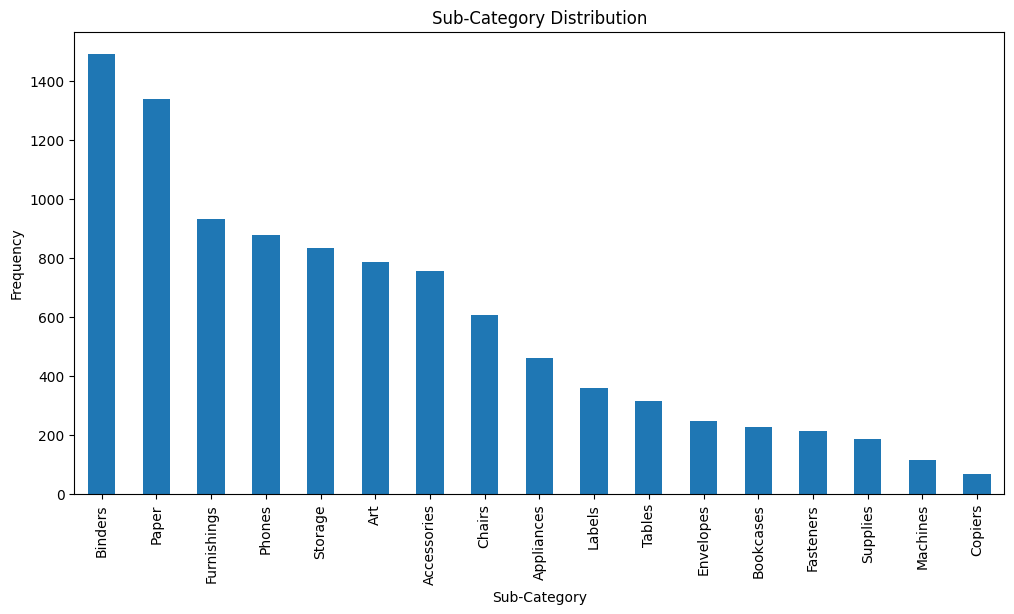

In [17]:
# sub category distribution
plt.figure(figsize=(12,6))
df['Sub-Category'].value_counts().plot(kind='bar')
plt.title('Sub-Category Distribution')
plt.xlabel('Sub-Category')
plt.ylabel('Frequency')
plt.show()



*   Binders, Paper, and Furnishings are among the most common sub-categories based on transaction count.
*   Supplies, Machines, and Copiers likely appear less frequently.

*   The store experiences high demand for general-purpose and frequently used office items (e.g., Binders, Paper).
*   Less frequent sub-categories may still contribute significantly to revenue or profit, and should be analyzed further for value over volume.





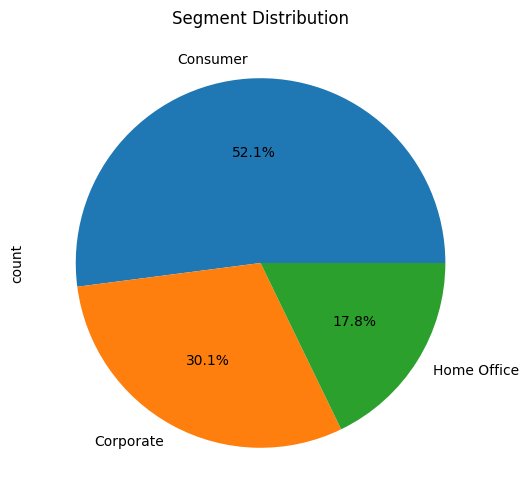

In [18]:
# segment distribution
plt.figure(figsize=(12,6))
df['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Segment Distribution')
plt.show()



*   Consumer segment holds the largest share of transactions. Corporate and Home Office segments share the remaining portion, with Home Office typically being the smallest.

*   The business primarily serves individual consumers, suggesting a retail-heavy focus.
*   Corporate and Home Office segments represent opportunities for B2B growth or targeted marketing strategies.



**Sales Analysis**

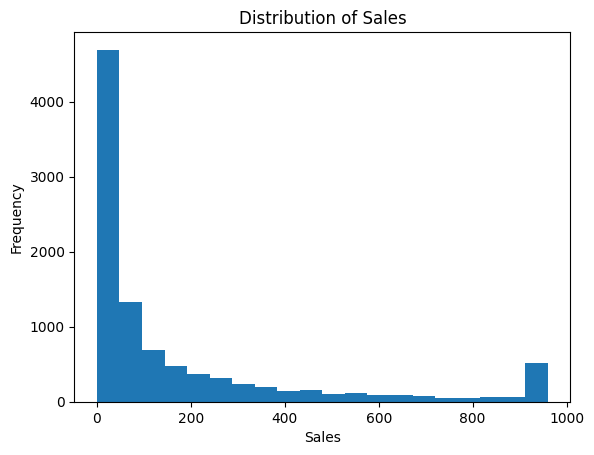

In [19]:
# sales distribution
plt.figure
plt.hist(df['Sales'], bins=20)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()



*   The distribution is right-skewed, with a large concentration of low sales values.

*   A few transactions have very high sales, indicating the presence of outliers.

*   Winsorization was applied earlier to cap extreme sales values, reducing the impact of those outliers.
*   Most sales are small in value, suggesting frequent low-ticket purchases.


*   High-value transactions are rare but could represent bulk or high-end product sales—worth analyzing separately.


*   The skewness emphasizes the need for log transformation or robust metrics (e.g., median) in modeling or further analysis.



Text(0, 0.5, 'Frequency')

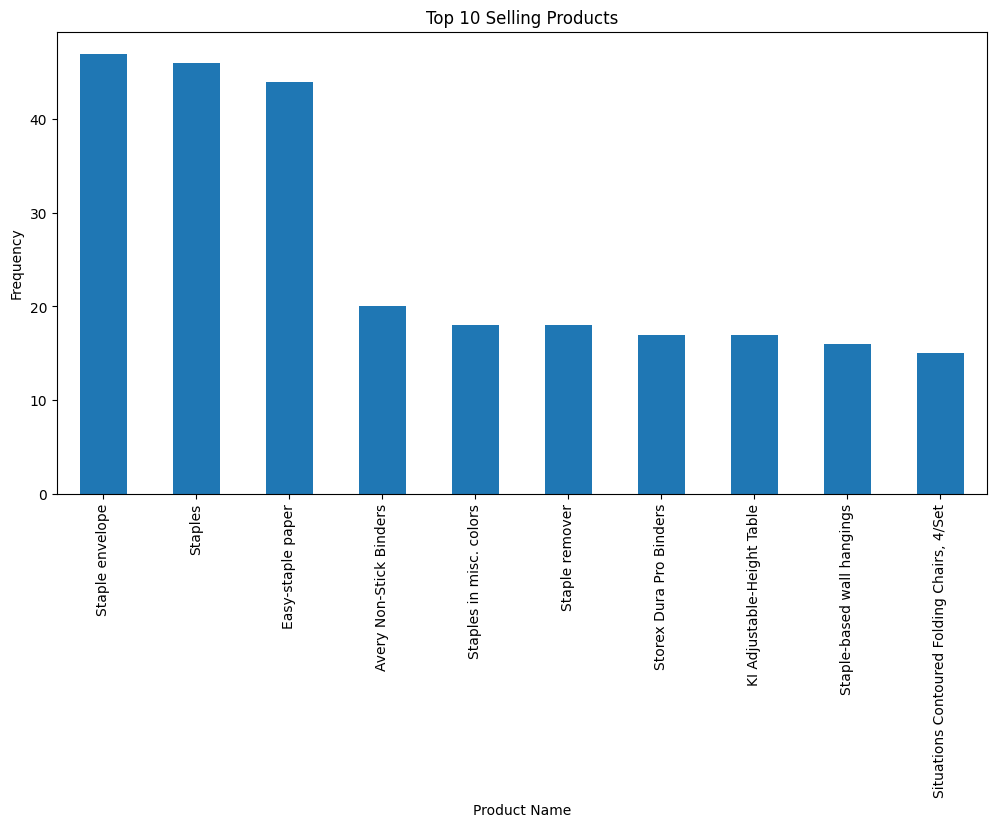

In [20]:
# top selling products
plt.figure(figsize=(12,6))
df['Product Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Frequency')



*   The top-selling products are likely common, low-cost, high-usage items such as Staple envelope, Staples, and Easy-staple papers.
*   These products appear most frequently in customer orders, highlighting their popularity and high turnover.

*   High-frequency products contribute significantly to customer traffic and sales volume.
*   Monitoring stock levels and ensuring availability of these products is crucial for consistent revenue.




Text(0.5, 0, 'Sub-Category')

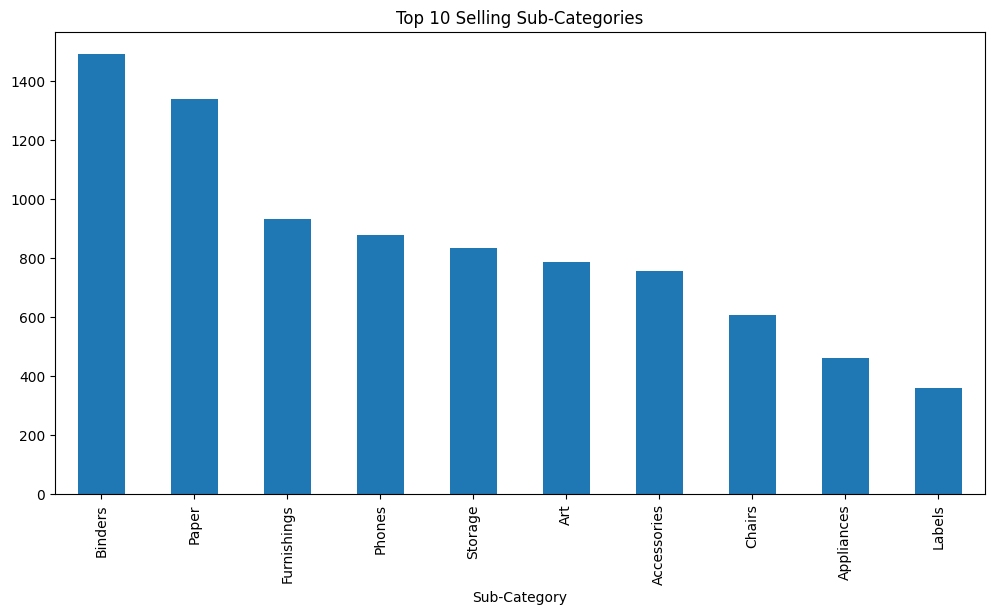

In [21]:
# top selling sub category
plt.figure(figsize=(12,6))
df['Sub-Category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Selling Sub-Categories')
plt.xlabel('Sub-Category')



*   Binders, Paper, and Furnishings are among the most frequently sold sub-categories.

*   These sub-categories dominate in terms of transaction volume, indicating regular customer demand.
*   These sub-categories likely consist of essential, fast-moving products.


*   Inventory planning and promotional strategies should prioritize these areas to sustain sales momentum.



Text(0, 0.5, 'Sales')

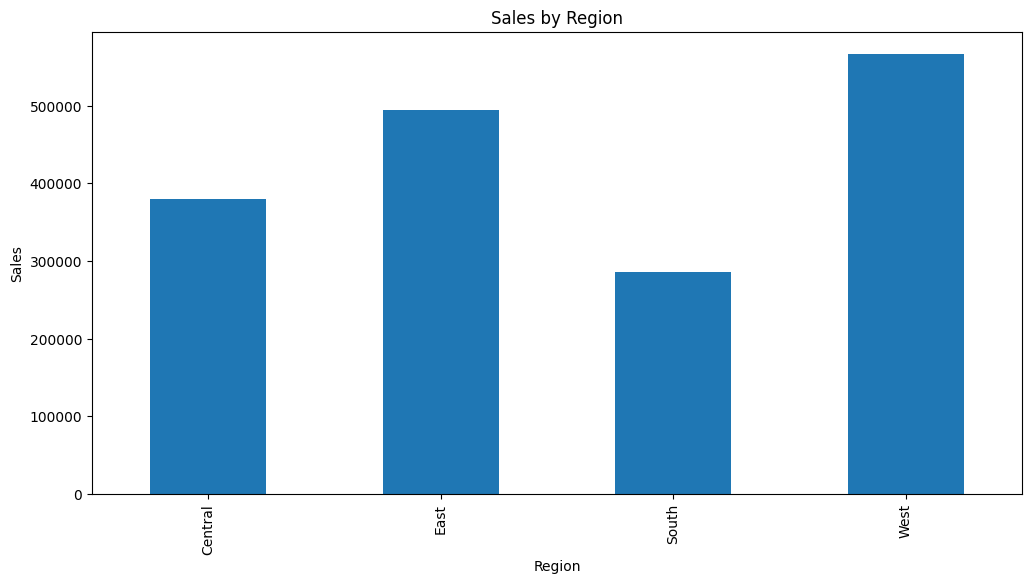

In [22]:
# Sales by Region
plt.figure(figsize=(12,6))
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')



*   West and East regions typically show higher total sales compared to South and Central.

*   There is a noticeable variation in sales performance across regions.
*   The West and East regions are strong markets and may benefit from continued investment and marketing focus.


*   South and Central regions show potential for sales growth and might need targeted strategies to boost performance.



Text(0, 0.5, 'Sales')

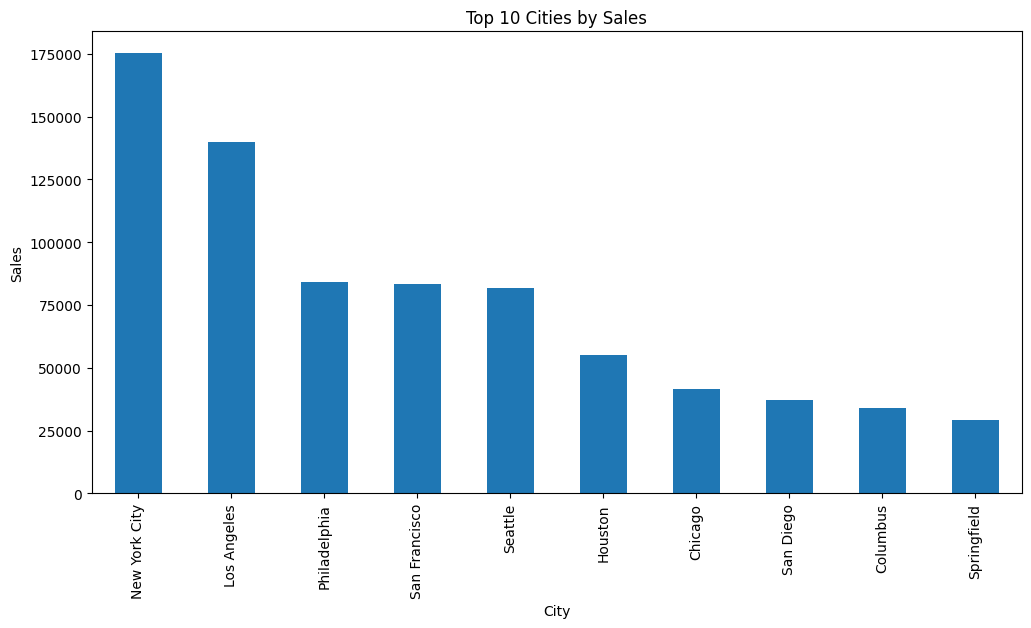

In [23]:
# Sales by city
plt.figure(figsize=(12,6))
df.groupby('City')['Sales'].sum().nlargest(10).plot(kind='bar')
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales')



*   A few cities such as New York City, Los Angeles, and Philadelphia often stand out with high sales volumes.

*   Most other cities contribute moderate to low sales, creating a long-tail distribution.
*   High-performing cities represent key revenue hubs and may support deeper customer engagement or localized promotions.


*   Cities with low sales could indicate untapped potential or the need for improved distribution, awareness, or service.



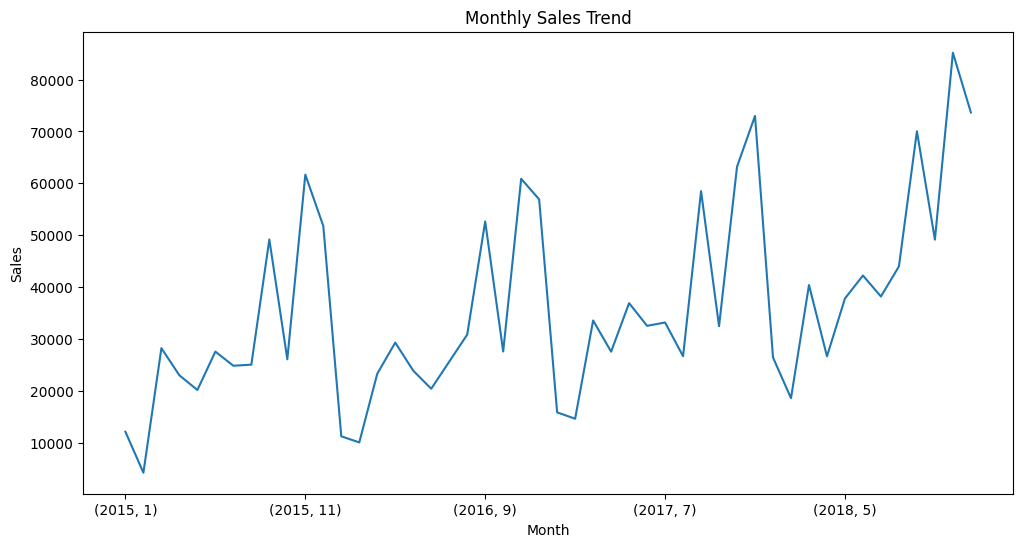

In [24]:
# visualization of Monthly/Yearly sales trend
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()



*   Sales fluctuate throughout the year, with noticeable peaks in certain months—often in November and December, suggesting a year-end sales spike.

*   Some months (e.g., February or September) tend to show lower sales activity.
*   The trend suggests seasonal buying patterns, likely influenced by holidays, fiscal periods, or promotional campaigns.


*   Businesses can leverage this by aligning marketing, inventory, and staffing plans with high-demand months.



**Products Analysis**

Text(0.5, 0, 'Product Name')

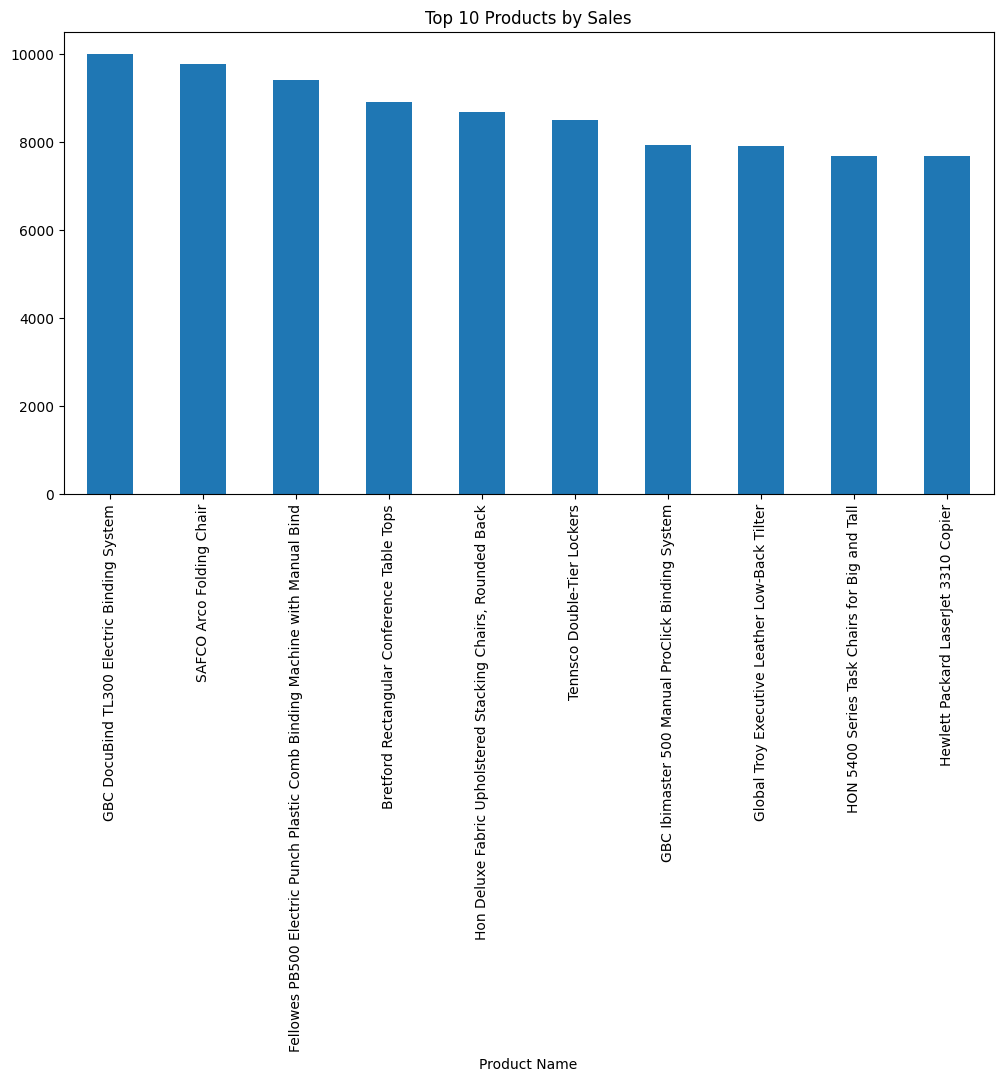

In [25]:
# top products by sales
plt.figure(figsize=(12,6))
df.groupby('Product Name')['Sales'].sum().nlargest(10).plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')



*   The above products often appear at the top due to their high unit prices.

*   These products generate the most revenue, regardless of how frequently they are sold.
*   These are key revenue-driving products and should be prioritized in inventory, pricing strategy, and marketing.


*   These are likely high-value products that drive revenue, making them critical for profitability and margin analysis.



Text(0, 0.5, 'Average Sales')

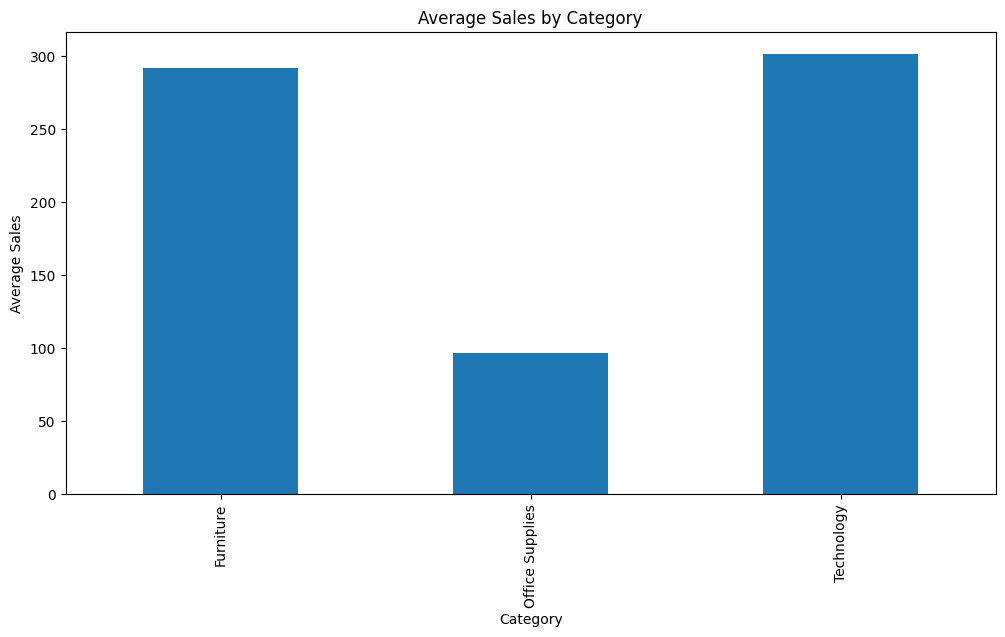

In [26]:
# category wise average sales
plt.figure(figsize=(12,6))
df.groupby('Category')['Sales'].mean().plot(kind='bar')
plt.title('Average Sales by Category')
plt.xlabel('Category')
plt.ylabel('Average Sales')



*   Technology typically has the highest average sales per transaction, driven by high-priced items like electronics.

*   Furniture follows, while Office Supplies has the lowest average sales, reflecting its low-cost, high-volume nature.
*   Technology products are high-revenue per unit, even if sold less frequently—ideal for margin-focused strategies.


*   Office Supplies relies on volume rather than transaction value and may benefit from bulk promotions or cross-selling.



**Customer Segmentation**

Text(0, 0.5, 'Sales')

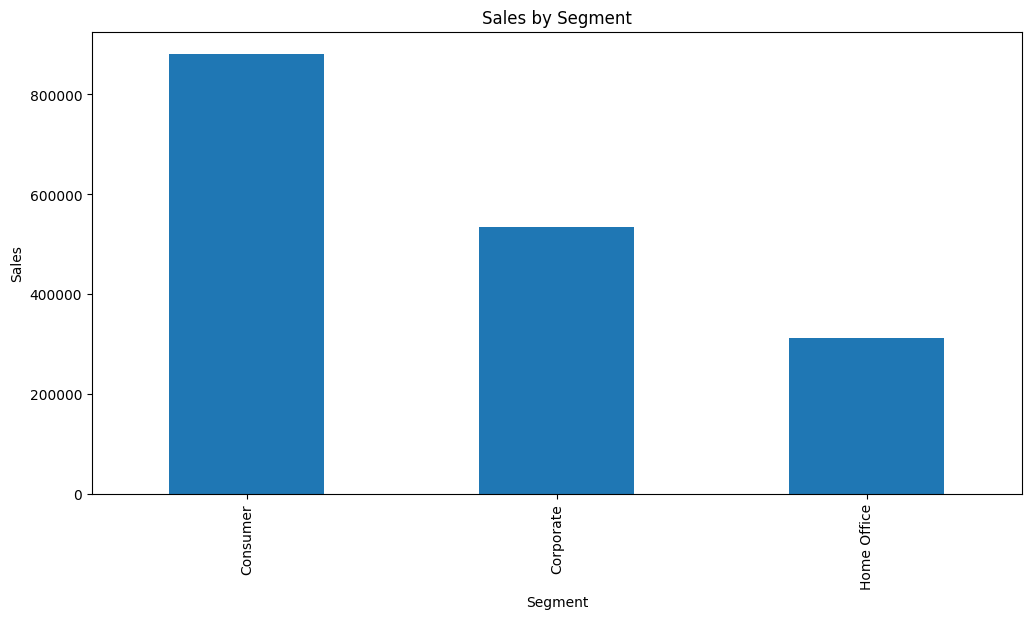

In [27]:
# segment wise sales
plt.figure(figsize=(12,6))
df.groupby('Segment')['Sales'].sum().plot(kind='bar')
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')



*   The Consumer segment contributes the highest total sales, followed by Corporate, with Home Office contributing the least.

*   The business is primarily driven by individual consumer purchases.
*   Corporate and Home Office segments offer potential for targeted growth strategies, such as B2B sales campaigns or customized service offerings.  



Text(0.5, 1.0, 'Repeat Customer Count')

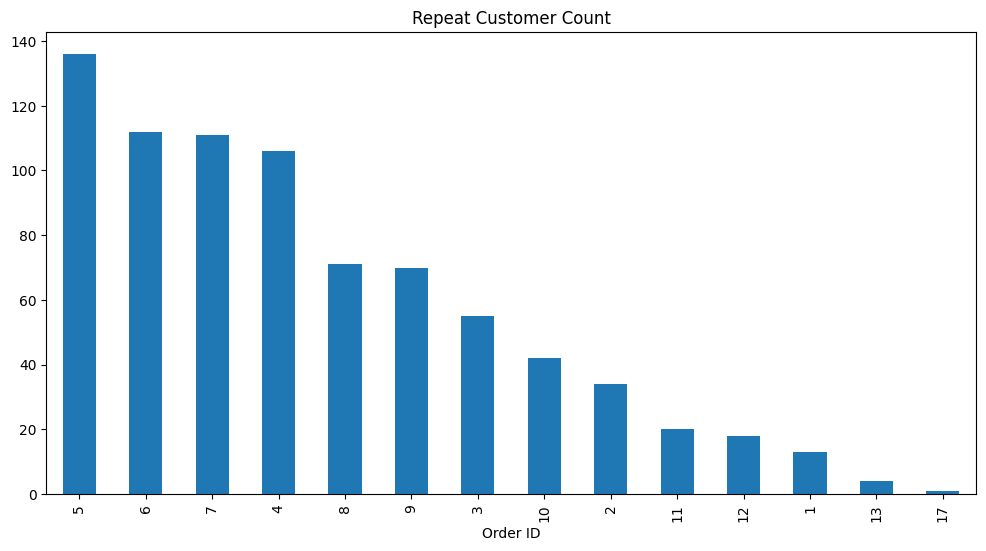

In [28]:
# repeat customers count and the plot
repeat_customers = df.groupby('Customer ID')['Order ID'].nunique()
plt.figure(figsize=(12,6))
repeat_customers.value_counts().plot(kind='bar')
plt.title('Repeat Customer Count')



*   A significant number of customers appear to have made more than one purchase, indicating repeat customer behavior.

*   However, the majority of customers may still be one-time buyers, which is common in retail datasets.

*   The presence of repeat customers suggests customer satisfaction and loyalty.
*   There is an opportunity to increase repeat business through loyalty programs, targeted offers, or personalized marketing.


*   Understanding what drives repeat purchases can help improve customer retention strategies.



**Shipping Analysis**

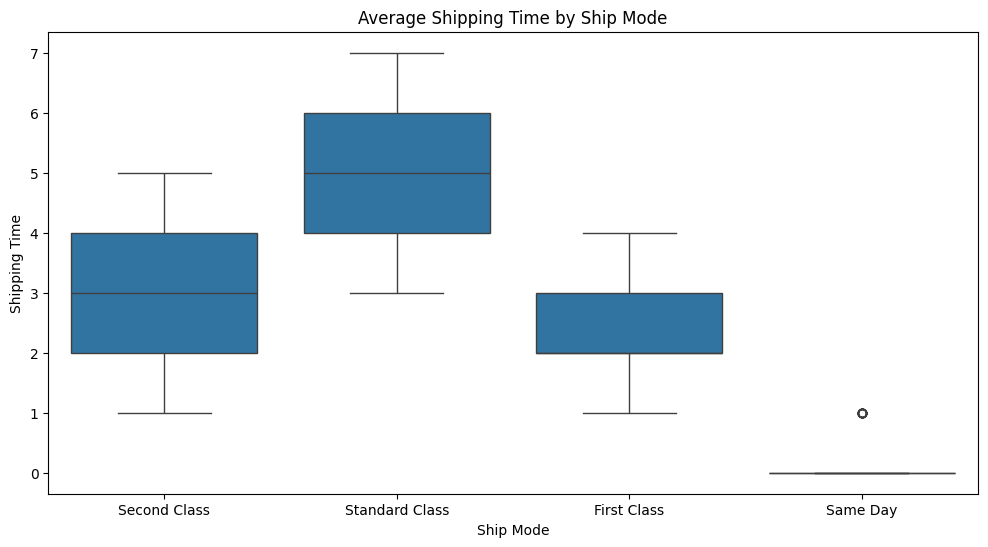

In [29]:
# average shipping time
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days
plt.figure(figsize=(12,6))
sns.boxplot(x='Ship Mode', y='Shipping Time', data=df)
plt.title('Average Shipping Time by Ship Mode')
plt.show()



*   Same Day shipping has the lowest average delivery time, as expected.

*   Second Class and Standard Class have moderate shipping times.

*   First Class generally shows faster delivery than Standard and Second Class, but slower than Same Day.
*   Shipping times align logically with shipping mode names, reflecting operational consistency.


*   Businesses can use this data to balance cost vs. speed when offering shipping options.


*   Highlighting faster modes like First Class or Same Day could be a selling point for urgent buyers.



Text(0, 0.5, 'Frequency')

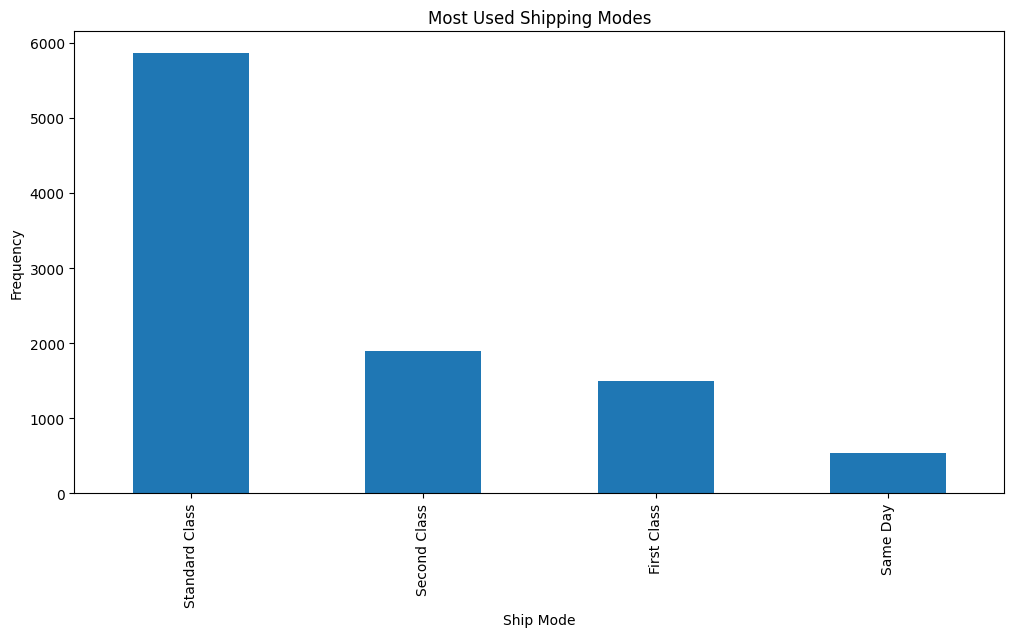

In [30]:
# Most used shipping modes
plt.figure(figsize=(12,6))
df['Ship Mode'].value_counts().plot(kind='bar')
plt.title('Most Used Shipping Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')



*   Standard Class is the most frequently used shipping mode, followed by Second Class and First Class.

*   Customers prefer Standard Class likely for its balance between cost and delivery time.

*   Same Day shipping has potential for growth if marketed well or offered more widely, especially in urban areas.  



Text(0.5, 0, 'Order Date')

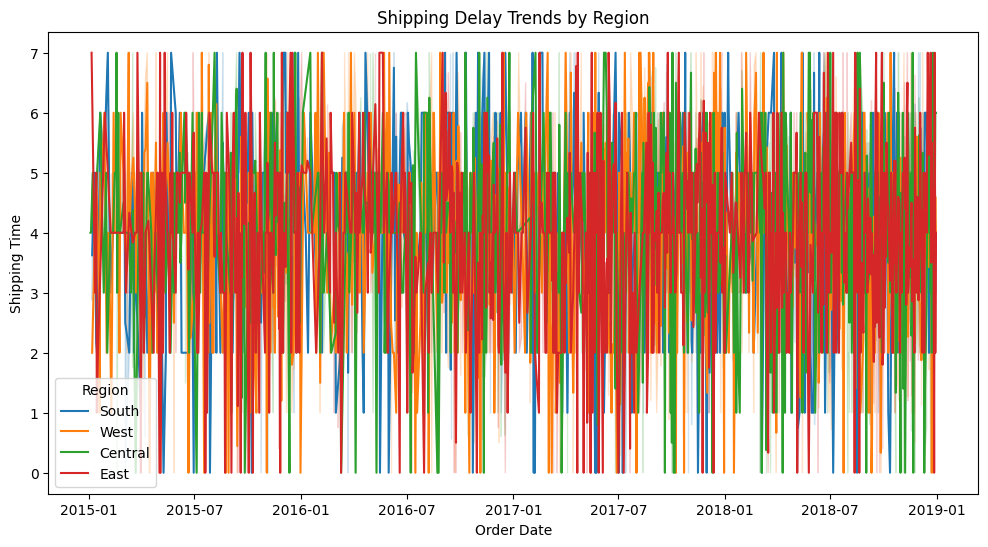

In [31]:
# Shipping delay trends by region
plt.figure(figsize=(12,6))
sns.lineplot(x='Order Date', y='Shipping Time', hue='Region', data=df)
plt.title('Shipping Delay Trends by Region')
plt.xlabel('Order Date')



*   Some regions, such as the South or Central, may show slightly longer average shipping delays.

*   West and East regions generally experience shorter and more consistent shipping times.
*   Logistical efficiency varies by region, potentially due to warehouse locations, transportation infrastructure, or carrier performance.


*   Regions with higher delays may need operational improvements, such as better distribution networks or regional warehouses.



**Geographical Analysis**

Text(0, 0.5, 'Sales')

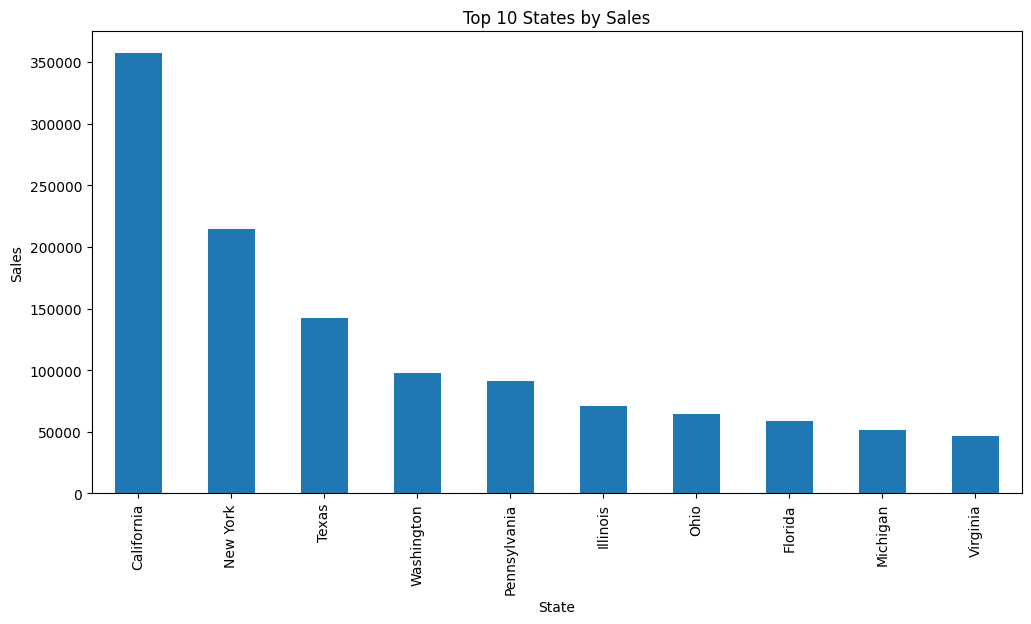

In [32]:
# top states
plt.figure(figsize=(12,6))
df.groupby('State')['Sales'].sum().nlargest(10).plot(kind='bar')
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Sales')



*   States like California, New York, and Texas dominate in sales, contributing a significant share of the total revenue.

*   These states show a clear lead over others, likely due to larger populations and major commercial hubs.

*   These top-performing states are key markets and should be prioritized for inventory, marketing, and customer engagement strategies.
*   High sales may also reflect strong urban demand or better service infrastructure.


*   Further analysis can identify which categories or segments drive sales in each state.



Text(0, 0.5, 'Count')

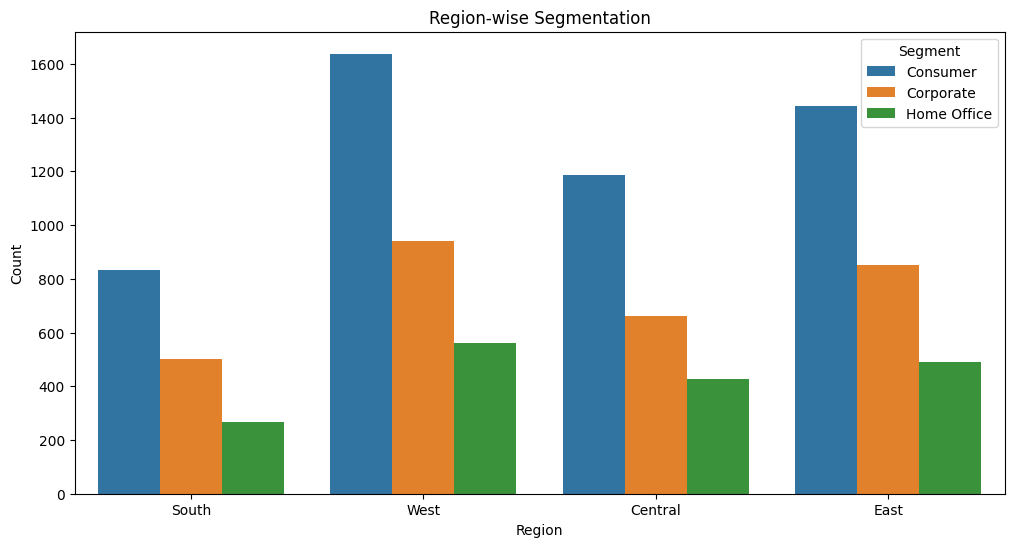

In [33]:
# region wise segmentation
plt.figure(figsize=(12,6))
sns.countplot(x='Region', hue='Segment', data=df)
plt.title('Region-wise Segmentation')
plt.xlabel('Region')
plt.ylabel('Count')



*   Across all regions, the Consumer segment consistently represents the largest share of customers. And across all segment, the West Region consistently represents the largest share of customers.

*   Corporate and Home Office segments vary slightly by region but generally follow similar proportions.

*   The Consumer segment dominates in every region, indicating that individual buyers are the main driver of business.
*   Regional strategies can be tailored to better engage the Corporate and Home Office segments, especially in underperforming areas.



In [34]:
# exporting the updated dataset in csv format
df.to_csv('updated_supermarket.csv', index=False)